### Wine Cluster Hierarchical and K-Means

#### Basic Library

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

#### Import Dataset

In [34]:
dataset=pd.read_csv('C:\\Users\\Admin\\Python\\Statistic Notes\\Dataset\\wine-clustering.csv')
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


#### To find the information about the dataset

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


####  Handling missing value

In [37]:
dataset.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

#### EDA

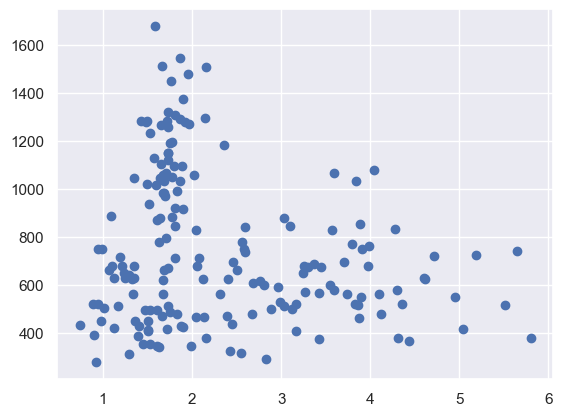

In [39]:
plt.scatter(x='Malic_Acid',y='Proline',data=dataset)
plt.show()

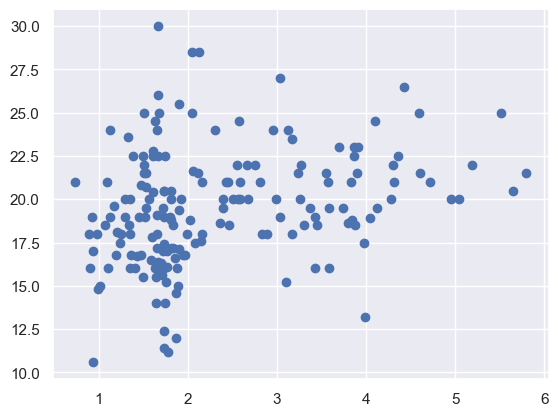

In [40]:
plt.scatter(x='Malic_Acid',y='Ash_Alcanity',data=dataset)
plt.show()

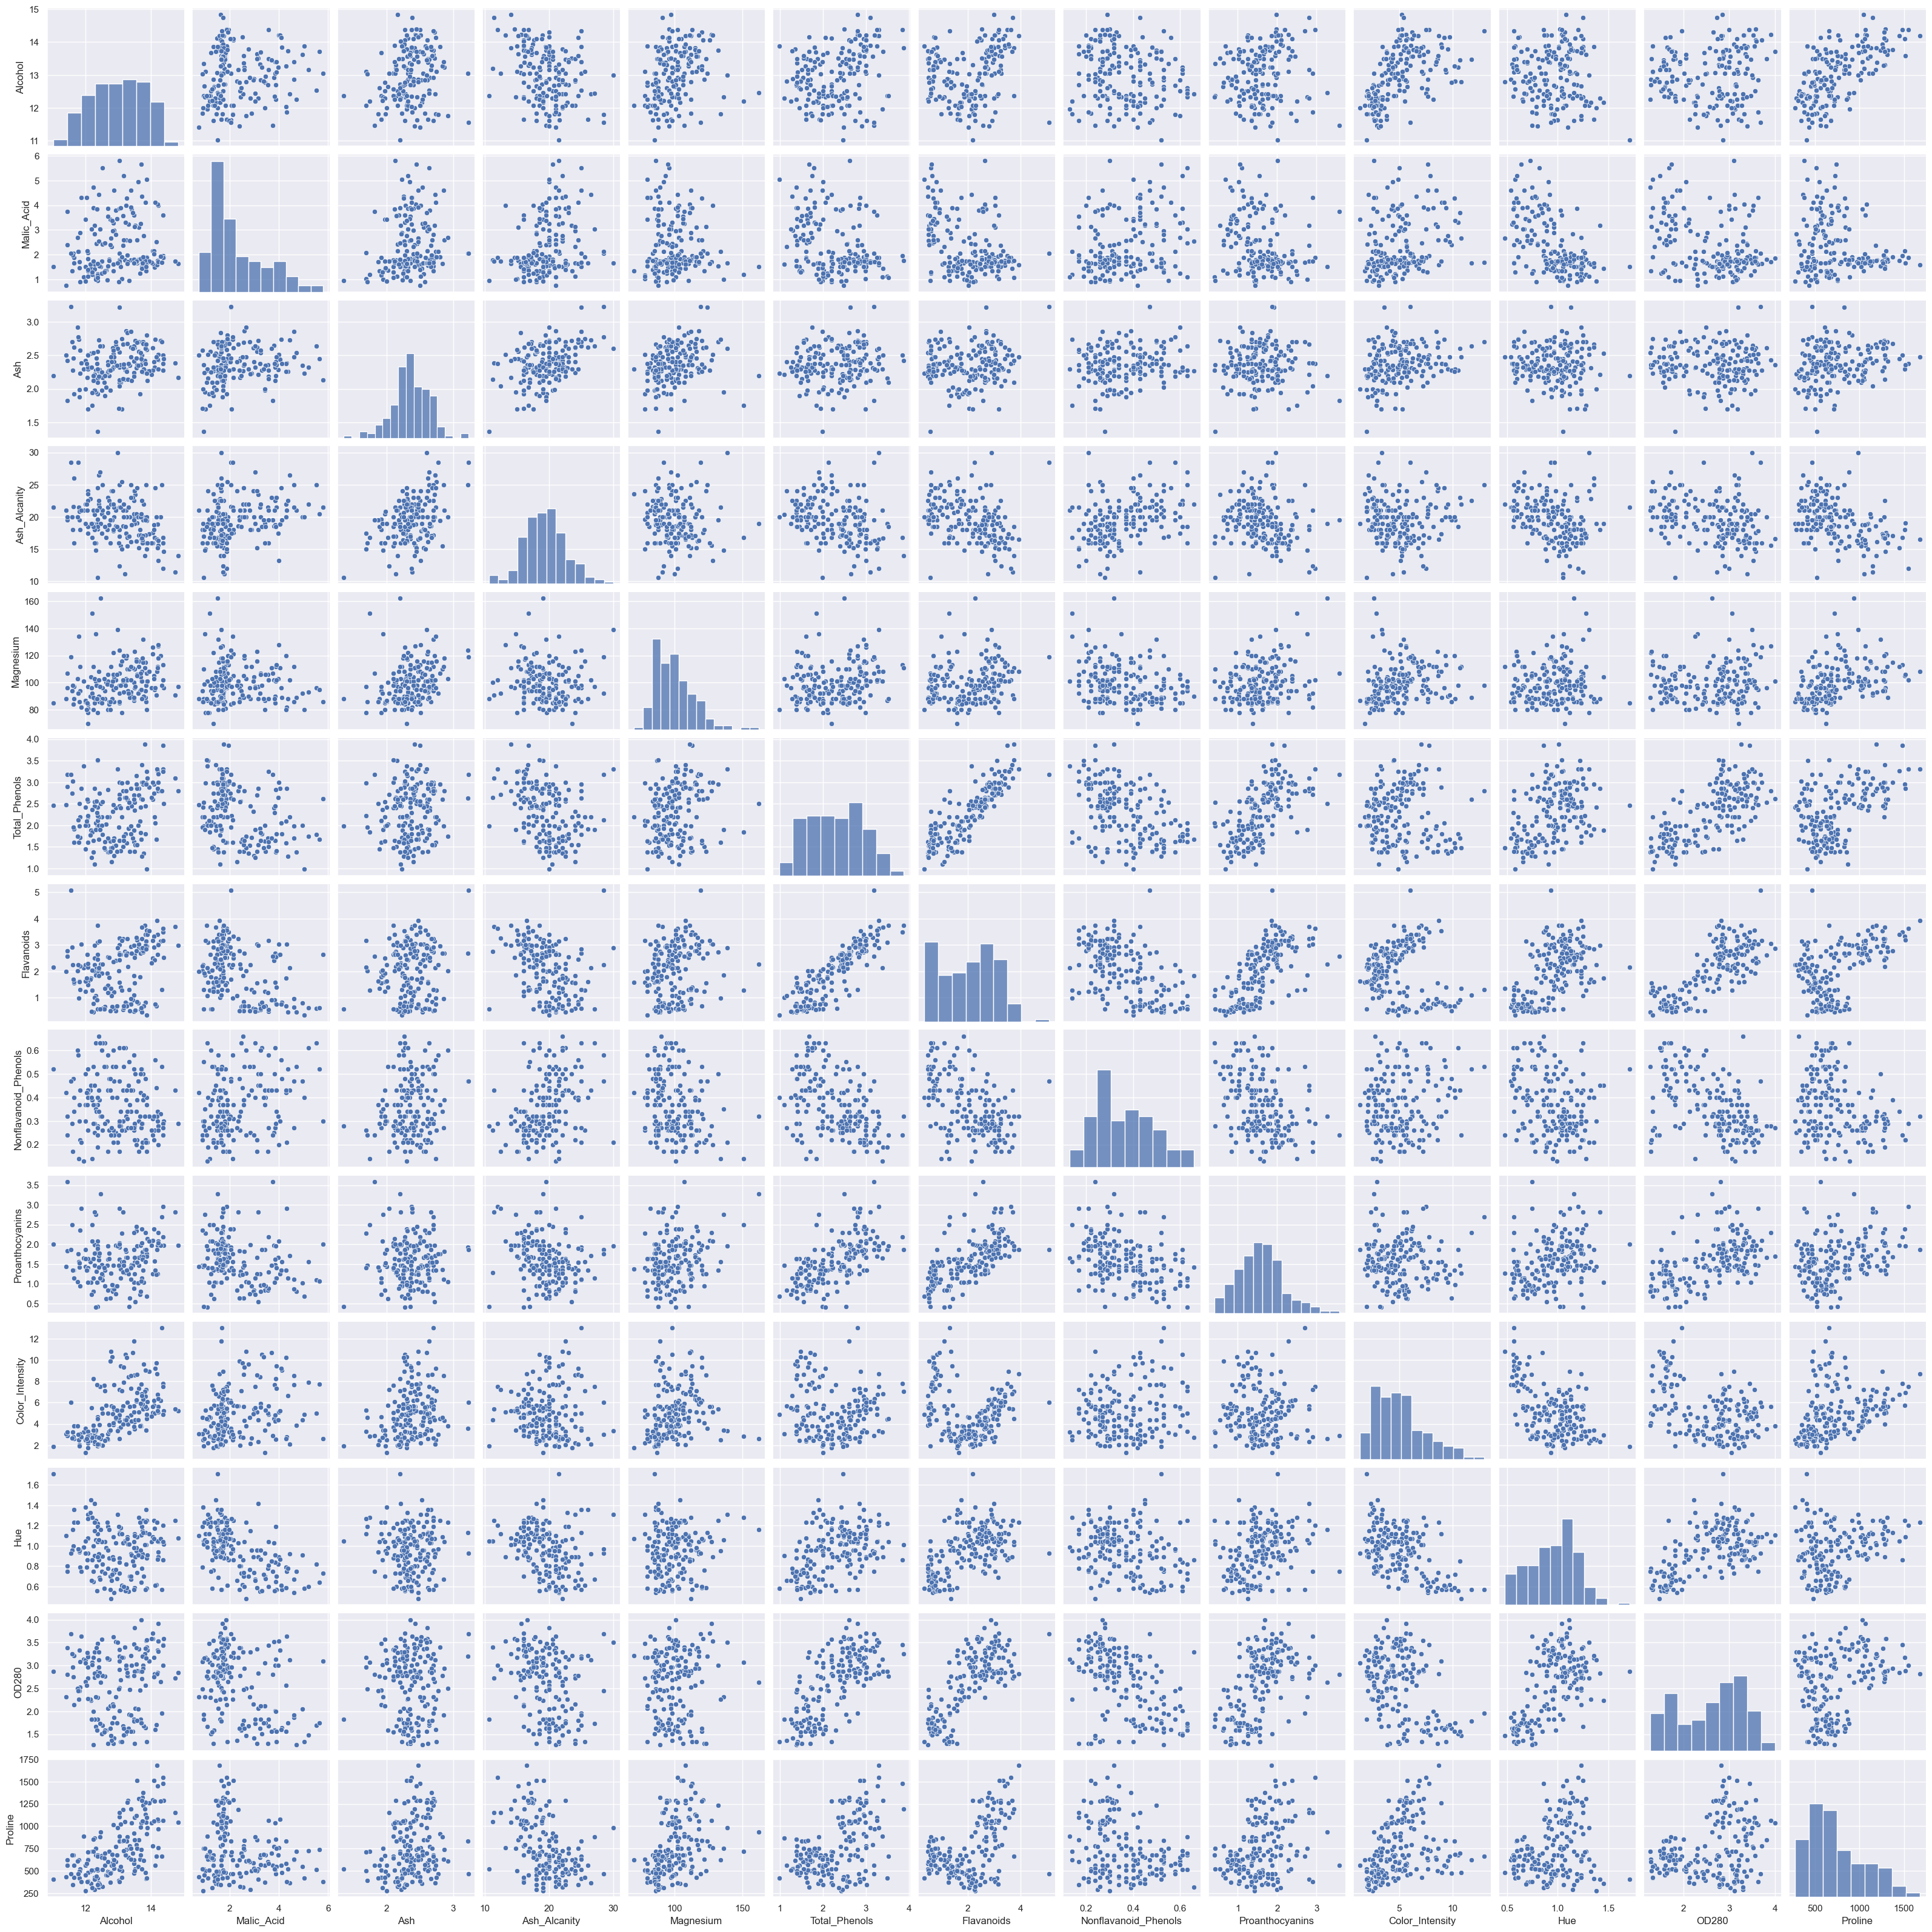

In [41]:
sns.pairplot(dataset)
plt.show()

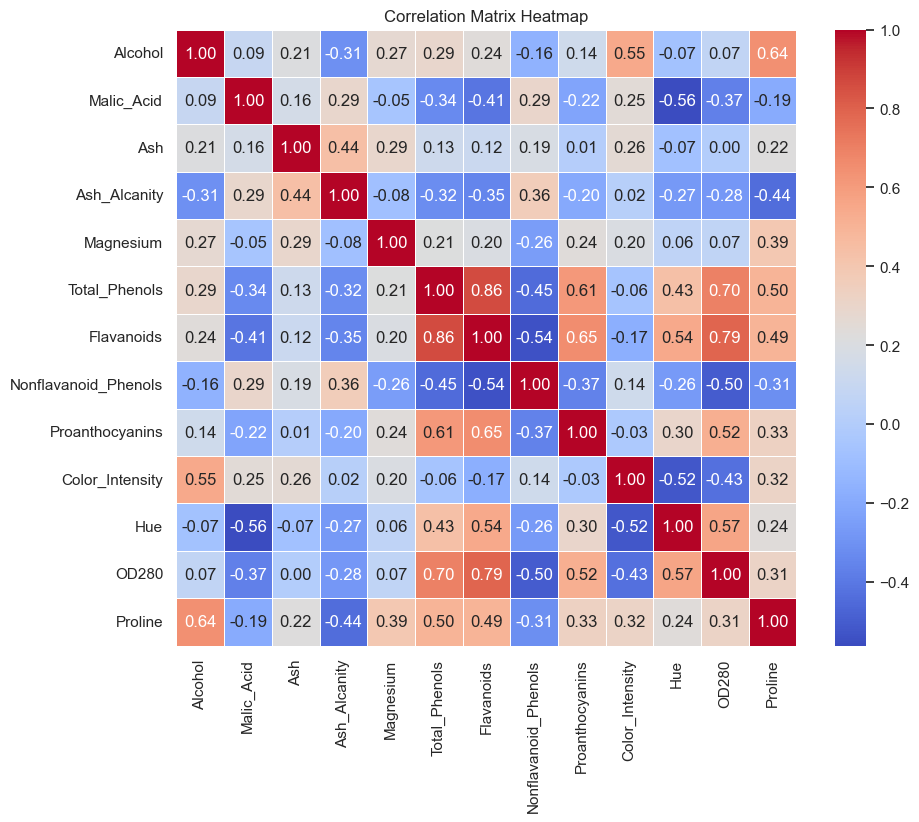

In [101]:
plt.figure(figsize=(10, 8))
sns.heatmap(dataset.corr(),annot=True,cmap='coolwarm',fmt=".2f",
            linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Hierarchical clustering

In [102]:
import scipy.cluster.hierarchy as sch

In [103]:
# Calculate the linkage matrix using the 'ward' method
hier_clust=sch.linkage(dataset,method='ward')

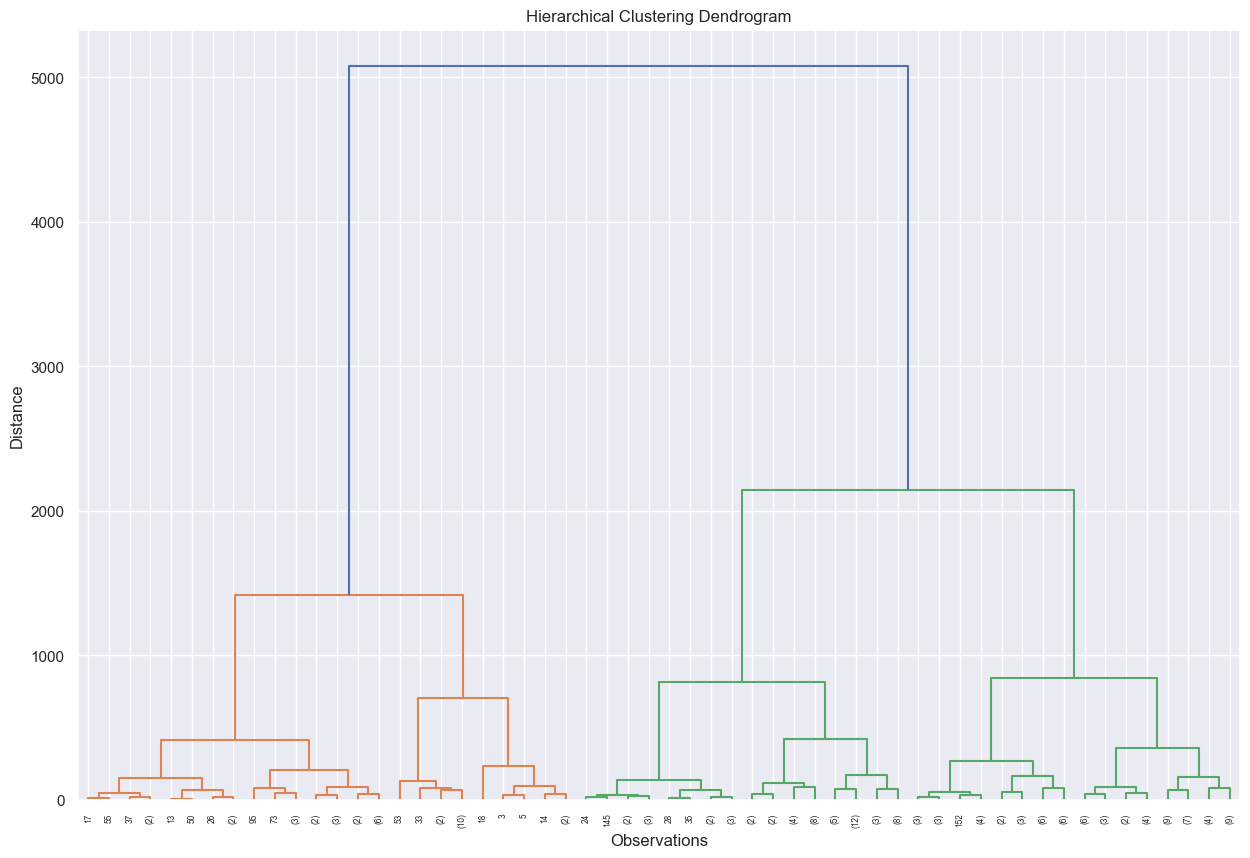

In [111]:
plt.figure(figsize=(15,10))
sch.dendrogram(hier_clust,p=5,truncate_mode='level')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
plt.show()

### k-Means Cluster

In [45]:
from sklearn.cluster import KMeans

In [82]:
wss = []

for i in range(2,15):
    km = KMeans(n_clusters=i,random_state=1)
    km.fit(x_scaler)
    wss.append(km.inertia_)

In [83]:
wss

[1659.0079672511501,
 1278.7607763668148,
 1175.5045995636679,
 1124.658470238073,
 1065.4444198647323,
 1008.3909716884825,
 972.2001137163057,
 922.2072124878543,
 878.7393302024984,
 847.7654289325403,
 812.2194181784795,
 780.950263093614,
 751.8014950353561]

In [84]:
a=[1,2,3,4,5,6,7,8,9,10,11,12,13]

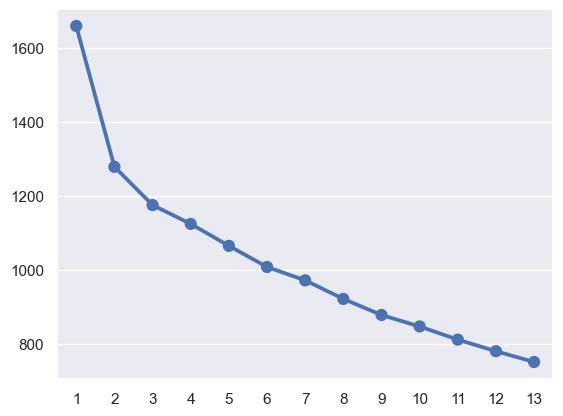

In [85]:
sns.pointplot(x=a,y=wss)
plt.show()

In [96]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(dataset)

KMeans(n_clusters=2)

In [97]:
pred=kmeans.predict(dataset)
pred

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

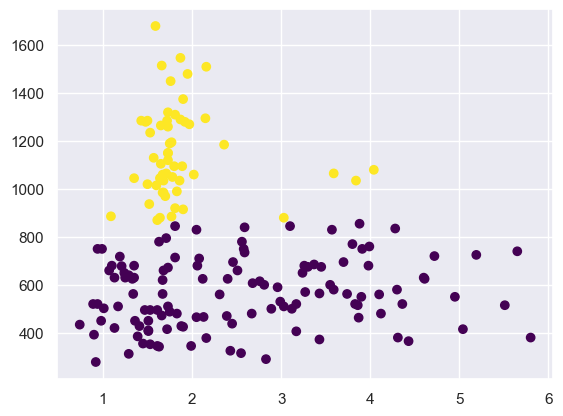

In [99]:
x=dataset.loc[:,['Malic_Acid']]
y=dataset.loc[:,['Proline']]
plt.scatter(x, y, c=pred,cmap='viridis')

In [100]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(dataset,labels=kmeans.labels_, metric='euclidean')

0.6568536504294317

#### Thank You for go through my work